<a href="https://colab.research.google.com/github/Sushmitha-712/bmi-app/blob/main/Lasso%26Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ================================================
# 1. IMPORTING LIBRARIES
# ================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ================================================
# 2. LOAD DATASET (Upload housing.csv to Colab)
# ================================================
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("housing.csv")   # Adjust filename if different
df.head()



Saving housing.csv to housing (1).csv


,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [3]:
df.columns


Index([' 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00'], dtype='object')

In [4]:
df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)


/tmp/ipython-input-4216691182.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)


Saving housing.csv to housing (2).csv
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
LASSO → MSE: 25.656739367167678  R²: 0.6501375183238987
RIDGE → MSE: 24.312903830491614  R²: 0.6684624359643558


/tmp/ipython-input-2260524011.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)


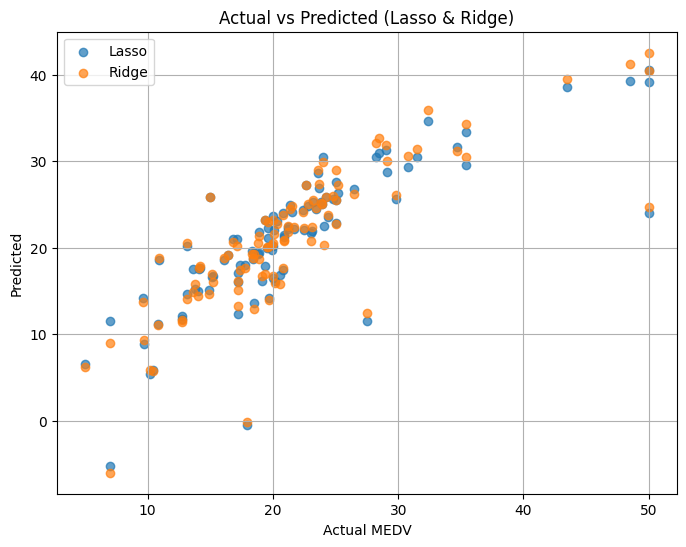

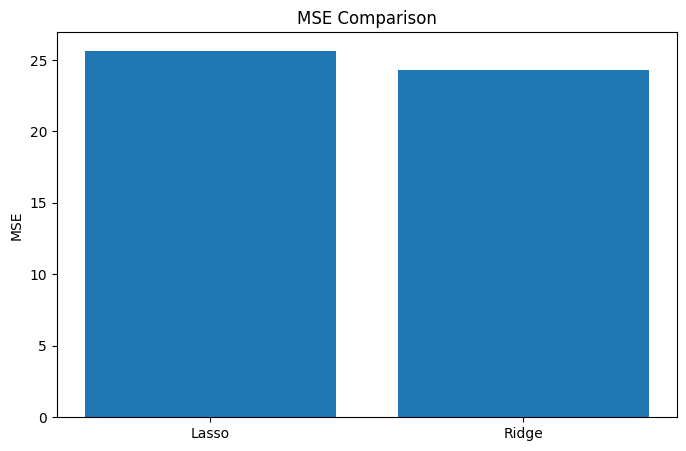

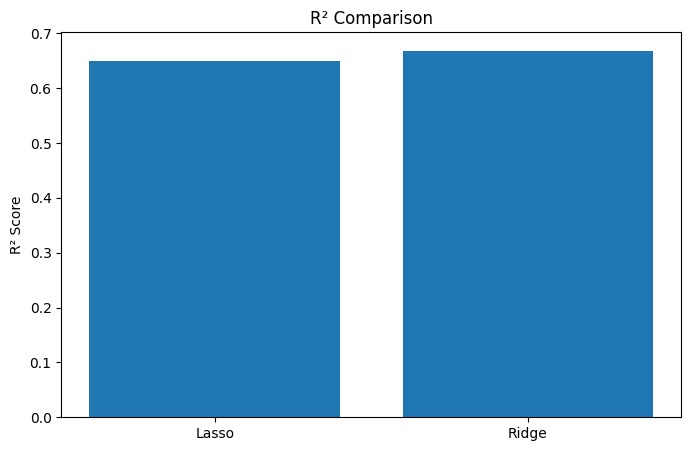

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Upload
from google.colab import files
uploaded = files.upload()

# Read space-separated data
df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)

# Boston Housing column names
df.columns = [
    'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
    'RAD','TAX','PTRATIO','B','LSTAT','MEDV'
]

print(df.head())
print(df.columns)

# Target
target = "MEDV"

X = df.drop(target, axis=1)
y = df[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print("LASSO → MSE:", lasso_mse, " R²:", lasso_r2)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print("RIDGE → MSE:", ridge_mse, " R²:", ridge_r2)

# Plot pred vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test, lasso_pred, alpha=0.7, label="Lasso")
plt.scatter(y_test, ridge_pred, alpha=0.7, label="Ridge")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted")
plt.legend()
plt.grid()
plt.title("Actual vs Predicted (Lasso & Ridge)")
plt.show()

# Comparison plots
models = ["Lasso", "Ridge"]
mse_vals = [lasso_mse, ridge_mse]
r2_vals = [lasso_r2, ridge_r2]

plt.figure(figsize=(8,5))
plt.bar(models, mse_vals)
plt.title("MSE Comparison")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(8,5))
plt.bar(models, r2_vals)
plt.title("R² Comparison")
plt.ylabel("R² Score")
plt.show()
